# **G2M: Insight for Cab Investment Firm**

#### **By**: Susan Zhang

##### **Date**: July 7th, 2023

# **Environment Set-up**

In [2]:
# Import Relevant Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Import Dataset
cab_data = pd.read_csv("Cab_Data.csv")                    # read in Cab_Data.csv
city_data = pd.read_csv("City.csv")                       # read in City.csv
customer_data = pd.read_csv("Customer_ID.csv")            # read in Customer_ID.csv
transaction_data = pd.read_csv("Transaction_ID.csv")      # read in Transaction_ID.csv

print(cab_data.head())                                    # display top (5) rows of read in cab_data
print(len(cab_data))
#print(cab_data)
#print(cab_data.dtypes)
print(city_data.head())                                   # display top (5) rows of read in city_data
print(len(city_data))
print(customer_data.head())                               # display top (5) rows of read in customer_data
print(len(customer_data))
print(transaction_data.head())                            # display top (5) rows of read in transaction_data
print(len(transaction_data))


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
359392
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
20
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1      

**Cleaning up the Datasets**

In [3]:
# Performing date conversion for cab_data

# Dates in Excel are just serial numbers that begin on Jan 1, 1900
# For example, January 1, 2016 is the serial number 42370, and January 8 is 42377
# Dates in Excel only look like dates when a date number format is applied!

# Importing datetime funtion from the datetime module
from datetime import datetime

for i in range (len(cab_data["Date of Travel"])):
  cab_data.loc[i, "Date of Travel"] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + cab_data.loc[i, "Date of Travel"] - 2)
  cab_data.loc[i, "Date of Travel"] = cab_data.loc[i, "Date of Travel"].strftime('%Y-%m-%d')


In [4]:
# Merge datasets cab_data, transaction_data, and customer_data into one master_data

merged_data = cab_data.merge(transaction_data, on = "Transaction ID").fillna("")
merged_data = merged_data.merge(city_data, on = "City").fillna("")
master_data = merged_data.merge(customer_data, on = "Customer ID").fillna("")

#master_data.to_csv("Master_Data.csv", index=False)

#print(merged_data.head())
#print(master_data.head())
#print(merged_data.head())
#print(len(merged_data))
print(master_data.head())
print(len(master_data))

   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Population     Users  \
0         370.95      313.6350        29290         Card   814,885    24,701    
1         598.70      317.4228        29290         Cash   814,885    24,701    
2         792.05      597.4020        29290         Card   814,885    24,701    
3         358.52      334.8540        27703         Card   814,885    24,701    
4         721.10      467.1192        27703         Card   814,885    24,701    

  Gender  Age  Income (USD/Month)  
0   Male   28               1081

In [5]:
# evaluate to see if there are any 'na' data (those with no City, Customer_ID, or Transaction_ID matches should have been discarded)
print(master_data.isna().sum())
print(len(master_data))

unique_cabs = np.unique(master_data["Company"])
print(unique_cabs)

print(len(np.unique(master_data["Date of Travel"])))
#data_grouped = master_data.groupby(['Date of Travel', 'Company']).size()
#print(data_grouped)


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Population            0
Users                 0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
359392
['Pink Cab' 'Yellow Cab']
1095


**Exploring the Datasets**

Company Date of Travel  Pink Cab  Yellow Cab
0           2016-01-02        41         140
1           2016-01-03        52         126
2           2016-01-04         4          21
3           2016-01-05         6          41
4           2016-01-06        23          86
...                ...       ...         ...
1090        2018-12-27        66         252
1091        2018-12-28       217         626
1092        2018-12-29       195         630
1093        2018-12-30        56         201
1094        2018-12-31        58         198

[1095 rows x 3 columns]


Text(0, 0.5, 'Number of Rides')

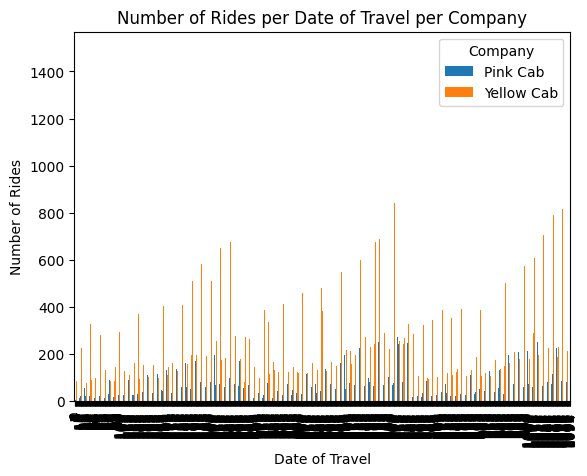

In [6]:
data_grouped = master_data.groupby(['Date of Travel', 'Company']).size().unstack(level=1).reset_index()
print(data_grouped)
ax = data_grouped.plot(kind="bar")
plt.title('Number of Rides per Date of Travel per Company')
plt.xlabel('Date of Travel')
plt.ylabel('Number of Rides')


Company
Pink Cab       84711
Yellow Cab    274681
dtype: int64


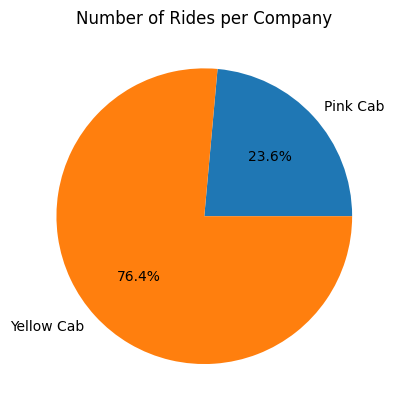

In [7]:
# total number of rides per company
occur = master_data.groupby(['Company']).size()
print(occur)

plt.pie(occur, labels = unique_cabs, autopct='%1.1f%%')
plt.title('Number of Rides per Company')
plt.show()


Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


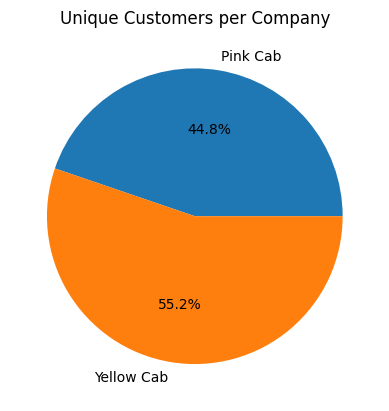

In [39]:
# unique customers per company
sep_cab = master_data.groupby('Company')['Customer ID'].nunique()

print(sep_cab)

plt.pie(sep_cab, labels = unique_cabs, autopct='%1.1f%%')
plt.title('Unique Customers per Company')
plt.show()


Company     Gender
Pink Cab    Female     37480
            Male       47231
Yellow Cab  Female    116000
            Male      158681
dtype: int64


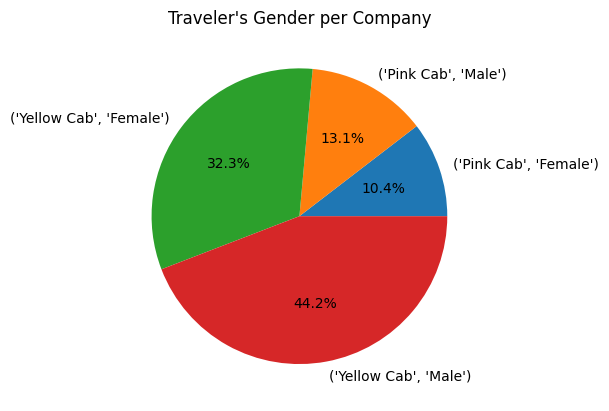

In [52]:
# unique customers per company
gender_grouped = master_data.groupby(['Company', 'Gender']).size()

print(gender_grouped)

plt.pie(gender_grouped.values, labels = gender_grouped.index, autopct='%1.1f%%')
plt.title('Traveler\'s Gender per Company')
plt.show()


Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


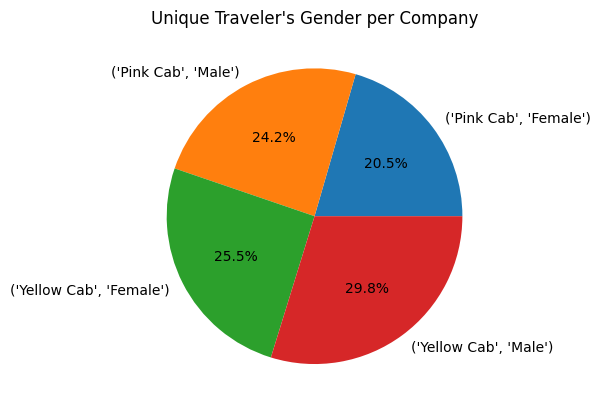

In [53]:
# unique gender travelers
unique_travelers = master_data.groupby(['Company', 'Gender'])

gender_grouped = unique_travelers['Customer ID'].nunique()
print(gender_grouped)

plt.pie(gender_grouped.values, labels = gender_grouped.index, autopct='%1.1f%%')
plt.title('Unique Traveler\'s Gender per Company')
plt.show()


It appears that Male Travelers use cab services at both companies more frequently than Female Travelers.

In [9]:
for i in range (len(cab_data["Price Charged"])):
  master_data.loc[i, 'Profit'] = cab_data.loc[i, "Price Charged"] - cab_data.loc[i, "Cost of Trip"]

print(master_data.head())

master_data.to_csv('Master_Data.csv')


   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Population     Users  \
0         370.95      313.6350        29290         Card   814,885    24,701    
1         598.70      317.4228        29290         Cash   814,885    24,701    
2         792.05      597.4020        29290         Card   814,885    24,701    
3         358.52      334.8540        27703         Card   814,885    24,701    
4         721.10      467.1192        27703         Card   814,885    24,701    

  Gender  Age  Income (USD/Month)  Profit  
0   Male   28           

Company Date of Travel    Pink Cab  Yellow Cab
0           2016-01-02   4516.6742  20742.4596
1           2016-01-03   7781.9950  15045.3314
2           2016-01-04    166.3720   1882.6054
3           2016-01-05    779.3024   4847.4418
4           2016-01-06   4804.0972   9178.5416
...                ...         ...         ...
1090        2018-12-27  12170.7492  36903.2274
1091        2018-12-28  30107.0288  88726.1860
1092        2018-12-29  26356.2482  89774.8192
1093        2018-12-30   7692.1350  28475.3772
1094        2018-12-31   8242.2096  27964.8016

[1095 rows x 3 columns]


Text(0, 0.5, 'Total Profit')

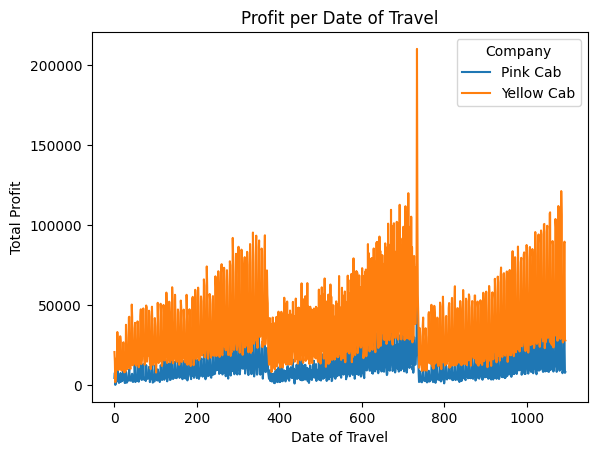

In [10]:
profit_grouped = master_data.groupby(['Date of Travel', 'Company']).Profit.sum().unstack(level=1).reset_index()
print(profit_grouped)
ax = profit_grouped.plot(kind="line")

#plt.plot(profit_grouped["Date of Travel"], profit_grouped["Pink Cab"])
#plt.plot(profit_grouped["Date of Travel"], profit_grouped["Yellow Cab"])
plt.title('Profit per Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Total Profit')


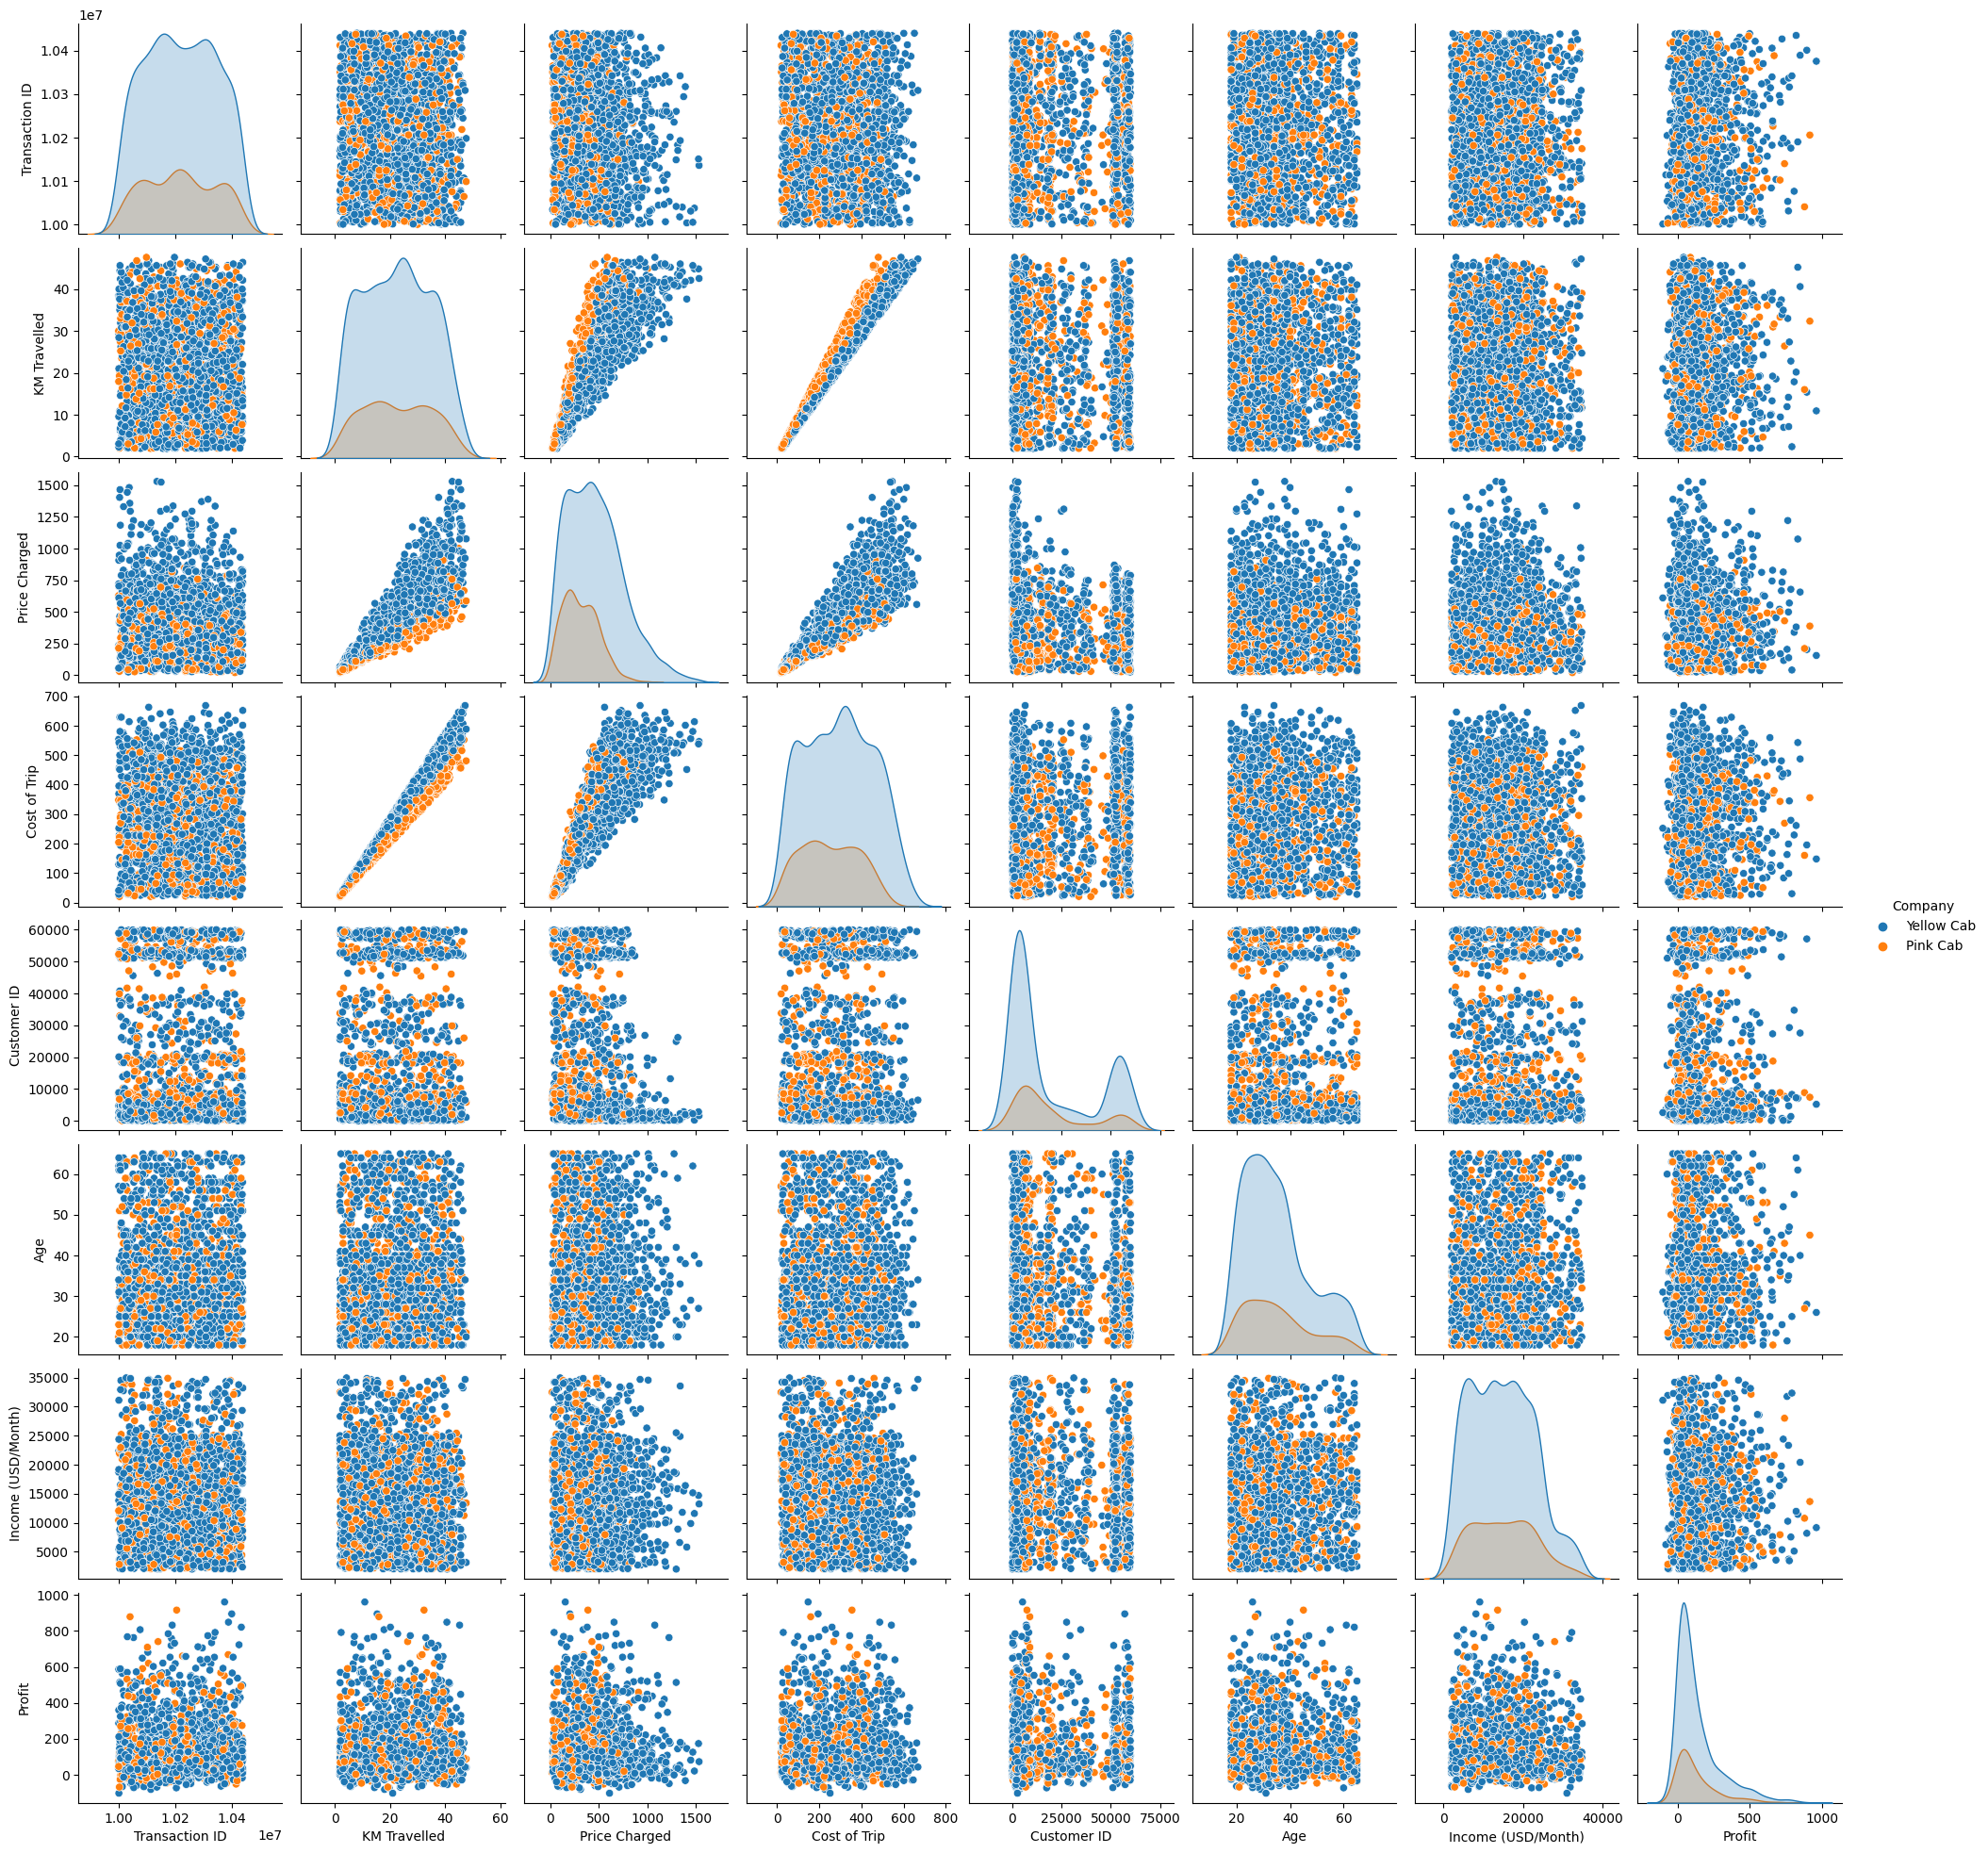

In [11]:
# The Seaborn Pairplot will allow us to plot pairwise relationships between variables within a dataset
# Using the entire dataset will take too long so we can just take a peek using 2000 points to get a general idea of what's going on
sns.pairplot(master_data.sample(2000), hue = 'Company')


In [12]:
data_correlation = master_data.corr()
print(data_correlation)


<ipython-input-12-6257f29f5440>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_correlation = master_data.corr()


                    Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Profit                    0.001475      0.001727       0.001033      0.000503   

                    Customer ID       Age  Income (USD/Month)    Profit  
Transaction ID        -0.016912 -0.001267           -0.001570  0.001475  
KM Travelled           0.000389 -0.000369           -0.000544  0.001727  
Price Charged         -0.177324 -0.003084       

It appears that there is a strong relationship between KM Travelled, Cost of Trip, and Price Charged.

In [13]:
master_data[['Year', 'Month', 'Day']] = master_data['Date of Travel'].str.split('-', expand=True)
print(master_data.head())


   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Population     Users  \
0         370.95      313.6350        29290         Card   814,885    24,701    
1         598.70      317.4228        29290         Cash   814,885    24,701    
2         792.05      597.4020        29290         Card   814,885    24,701    
3         358.52      334.8540        27703         Card   814,885    24,701    
4         721.10      467.1192        27703         Card   814,885    24,701    

  Gender  Age  Income (USD/Month)  Profit  Year Month Day  
0   Male

Company  Year      Pink Cab    Yellow Cab
0        2016  3.528726e+06  1.121503e+07
1        2017  4.159073e+06  1.333723e+07
2        2018  4.162428e+06  1.292522e+07


Text(0, 0.5, 'Total Profit')

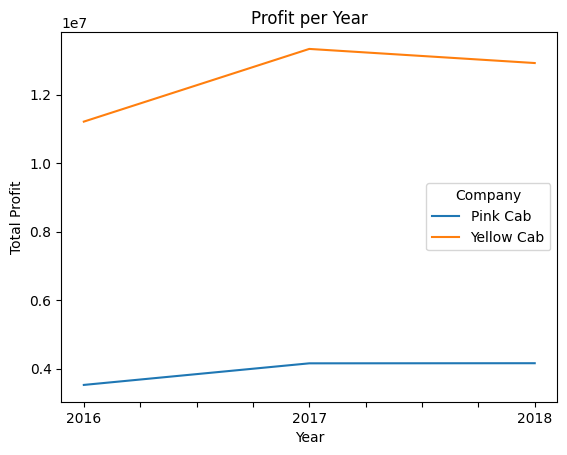

In [64]:
# profit per year per company
profit_year_grouped = master_data.groupby(['Year', 'Company']).Profit.sum().unstack(level=1).reset_index()
#print(master_data.groupby(['Year', 'Company']).Profit.mean())
print(profit_year_grouped)
#ax = profit_year_grouped.plot(kind = "line")
profit_year_grouped.set_index('Year').plot()
plt.title('Profit per Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')


Profit peaked in 2017 for both companies.

Company Month      Pink Cab    Yellow Cab
0          01  6.988435e+05  2.469028e+06
1          02  4.744970e+05  2.019252e+06
2          03  6.023738e+05  2.418396e+06
3          04  5.908694e+05  2.349447e+06
4          05  7.255554e+05  2.583354e+06
5          06  8.449083e+05  2.548529e+06
6          07  9.299922e+05  2.881646e+06
7          08  1.049573e+06  3.240644e+06
8          09  1.342552e+06  3.705345e+06
9          10  1.478984e+06  4.135192e+06
10         11  1.531041e+06  4.316728e+06
11         12  1.581038e+06  4.809913e+06


Text(0, 0.5, 'Total Profit')

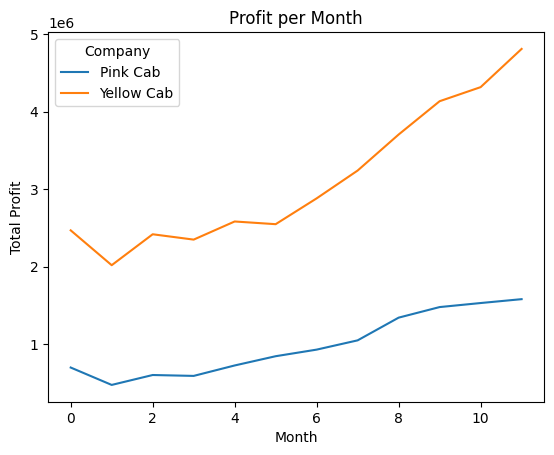

In [15]:
profit_month_grouped = master_data.groupby(['Month', 'Company']).Profit.sum().unstack(level=1).reset_index()
print(profit_month_grouped)
ax = profit_month_grouped.plot(kind="line")
plt.title('Profit per Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')


Profits are higher in the later months of the year.

Month
01    23174
02    18307
03    21646
04    21434
05    23701
06    24713
07    27676
08    31323
09    36859
10    40852
11    42700
12    47007
dtype: int64


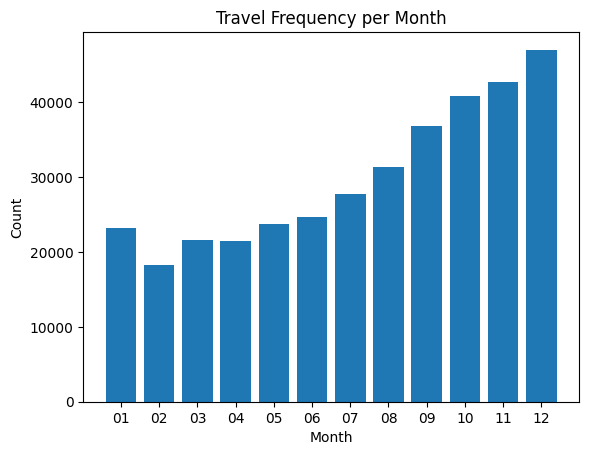

In [16]:
month_grouped = master_data.groupby(['Month']).size()
print(month_grouped)
plt.bar(month_grouped.index, month_grouped.values)
plt.title('Travel Frequency per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Appears to have more rides in the later months of the year which makes sense because the number of travelers is more likely to ramp up during the holiday season (ex: Thanksgiving, Christmas, and New Years).

Year
2016    107319
2017    128510
2018    123563
dtype: int64


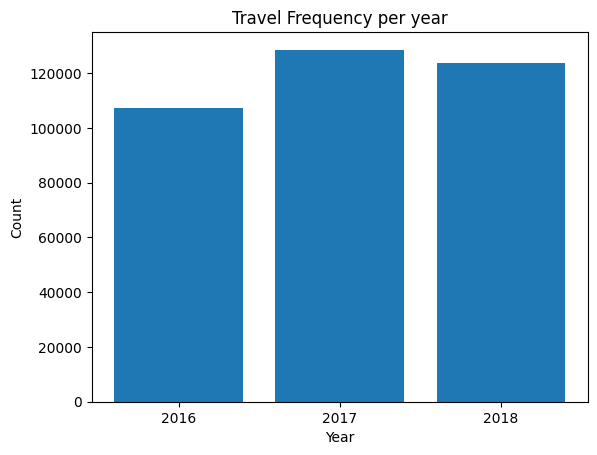

In [17]:
year_grouped = master_data.groupby(['Year']).size()
print(year_grouped)
plt.bar(year_grouped.index, year_grouped.values)
plt.title('Travel Frequency per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Traveling rates have increased since 2016, with the most people traveling in 2017.

**Conclusion:** According to the exploration, it appears that the Yellow Cab has more customers than the Pink Cab and is generating more profit, thus it seems that the Yellow Cab would be a better company to invest in.